Predicting Credit Card Defaults
===

The data were gathered as part of a study by two Taiwanese universities to compare the accuracy of data mining methods. Its significance and relevance is apparent in determining the best predictive attributes for credit card defaults. 

The 2005 dataset consists of demographic information for 30,000 Taiwanese credit card holders. It also includes six months worth of repayment status, bill amount, and payment amount data. 

In this report I will begin to determine if **age, marital status, or credit limit** are able to predict credit card payment defaults. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rc
import pylab as P

cc_defaults = pd.read_csv('Credit Card Defaults.csv')

### Summary

The summary statistics below for a few of the attributes (sex, education, marriage) are not useful since the number values correspond to a classification. For continuous attributes, we see can see the distribution of balance limit as well as the ages of the subjects. The **mean** limit balance is 167,484 NT Dollars, and the **median** is 140,000. The maximum limit is 1,000,000 so these extreme upper values may skew the mean. **The median is probably the best measure of central tendency for this attribute, for example.**

In [2]:
cc_defaults.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [3]:
cc_defaults.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


### Comparing Marital Status

The raw number of defaults between the married and single subjects are very close, but there is clearly a higher number of single people who did not default than there are those who are married. This could be a significant difference. 

Note: I have excluded to 54 indivdiuals who were classified as "0" in the marriage column, as there is no explanation as to what this means.

In [4]:
cc_mar = cc_defaults.loc[cc_defaults['MARRIAGE'] != 0]
cc_marriage = cc_mar.groupby(['MARRIAGE', 'default.payment.next.month']).count()
cc_marriage

ID  LIMIT_BAL    SEX  EDUCATION  \
MARRIAGE default.payment.next.month                                       
1        0                           10453      10453  10453      10453   
         1                            3206       3206   3206       3206   
2        0                           12623      12623  12623      12623   
         1                            3341       3341   3341       3341   
3        0                             239        239    239        239   
         1                              84         84     84         84   

                                       AGE  PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  \
MARRIAGE default.payment.next.month                                             
1        0                           10453  10453  10453  10453  10453  10453   
         1                            3206   3206   3206   3206   3206   3206   
2        0                           12623  12623  12623  12623  12623  12623   
         1                            3341   3341   3341   3341   3341   3341   
3        0                             239    239    239    239    239    239   
         1                              84     84     84     84     84     84   

                                       ...     BILL_AMT3  BILL_AMT4  \
MARRIAGE default.payment.next.month    ...                            
1        0                             ...         10453      10453   
         1                             ...          3206       3206   
2        0                             ...         12623      12623   
         1                             ...          3341       3341   
3        0                             ...           239        239   
         1                             ...            84         84   

                                     BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
MARRIAGE default.payment.next.month                                             
1        0                               10453      10453     10453     10453   
         1                                3206       3206      3206      3206   
2        0                               12623      12623     12623     12623   
         1                                3341       3341      3341      3341   
3        0                                 239        239       239       239   
         1                                  84         84        84        84   

                                     PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
MARRIAGE default.payment.next.month                                          
1        0                              10453     10453     10453     10453  
         1                               3206      3206      3206      3206  
2        0                              12623     12623     12623     12623  
         1                               3341      3341      3341      3341  
3        0                                239       239       239       239  
         1                                 84        84        84        84  

[6 rows x 23 columns]

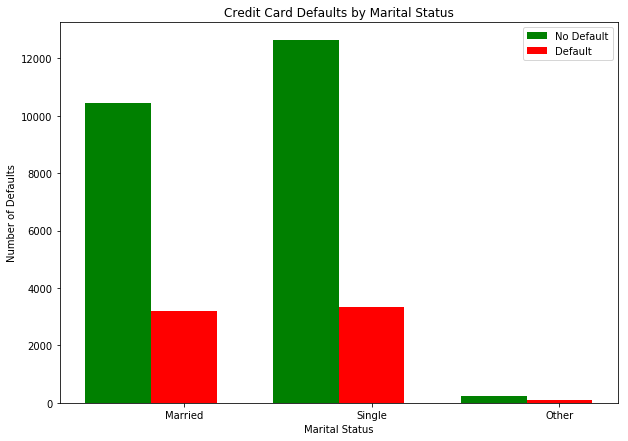

In [5]:
plt.figure(figsize=(10, 7))

n_groups = 3
index = np.arange(n_groups)
bar_width = 0.35
no_default = (10453, 12623, 239)
default = (3206, 3341, 84)

plt.bar(index, no_default, bar_width, color='g', label='No Default')

plt.bar(index + bar_width, default, bar_width, color='r', label='Default')
 
plt.xlabel('Marital Status')
plt.ylabel('Number of Defaults')
plt.title('Credit Card Defaults by Marital Status')
plt.xticks(index + bar_width, ('Married', 'Single', 'Other'))
plt.legend()
 
plt.show()

### Comparing Age

The ages of the subjects center around a **mean of 35.5 years and median of 34**. The maximum is 79 and the minimum is 21. Again, the upper extremes may skew the mean, but the age data appears to be more collected in the lower end so the upper outliers have a lesser effect. 

I would predict that default rates aren't significantly impacted by age, and that seems to be the case. Overall, those who did not default are slightly younger and more tightly centered around the median, although the total range is greater than those who did default. Indeed, the **p-value of 0.20 is relatively large**, confirming that **age is not much of a factor** in credit defaults in these data.

In [6]:
no_defaults = cc_defaults.loc[cc_defaults['default.payment.next.month'] == 0]
defaults = cc_defaults.loc[cc_defaults['default.payment.next.month'] == 1]

In [7]:
nd_age = no_defaults['AGE']
de_age = defaults['AGE']

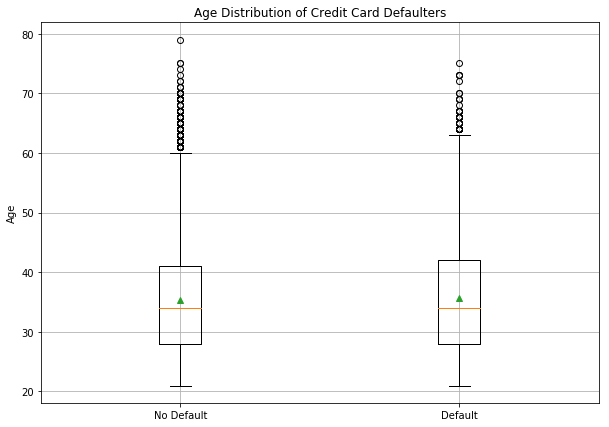

In [8]:
plt.figure(figsize=(10, 7))

plt.ylabel('Age')
plt.title('Age Distribution of Credit Card Defaulters')
plt.boxplot([nd_age, de_age], showmeans=True)
ax = plt.gca()
ax.grid(True)
plt.xticks([1, 2], ['No Default', 'Default'])

plt.show()

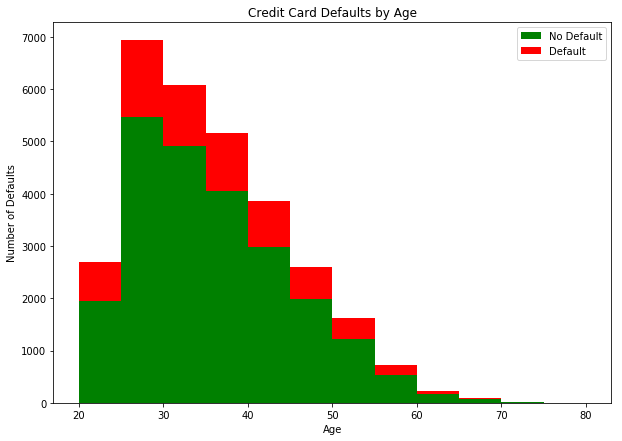

In [9]:
plt.figure(figsize=(10, 7))
plt.hist([no_defaults['AGE'],defaults['AGE']],
          bins=[20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80], stacked=True, 
                 color = ['g','r'], label = ['No Default', 'Default'])
P.legend()
plt.title('Credit Card Defaults by Age')
plt.xlabel('Age')
plt.ylabel('Number of Defaults')
opacity = 0.5

plt.show()

In [10]:
diff=de_age.mean( ) - nd_age.mean()
size = np.array([len(nd_age), len(de_age)])
sd = np.array([nd_age.std(), de_age.std()])
diff_se = (sum(sd ** 2 / size)) ** 0.5   
from scipy.stats import ttest_ind
print(ttest_ind(de_age, nd_age, equal_var=False))

Ttest_indResult(statistic=2.3195212416592628, pvalue=0.020386490255874631)


### Comparing Credit Limit

Finally, I predict that individuals with a lower credit limit have a higher chance of default. These graphs appear to show that this may be the case for these data. Defaults for subjects with limits 10,000 NT and below seem to be higher in percentage than those with limits of 30,000 NT and above. 

(Note: I chose to use a different vertical scale for the two graphs below because this clearly displays the sharp dropoff between the first two "Default" bins compared to the much more gradual drop in "No Default" bins in that same span.)

The resulting p-value between the defaults and non-defaults is extremely small, so we can conclude that there is a correlation between credit limit and chance of default. 

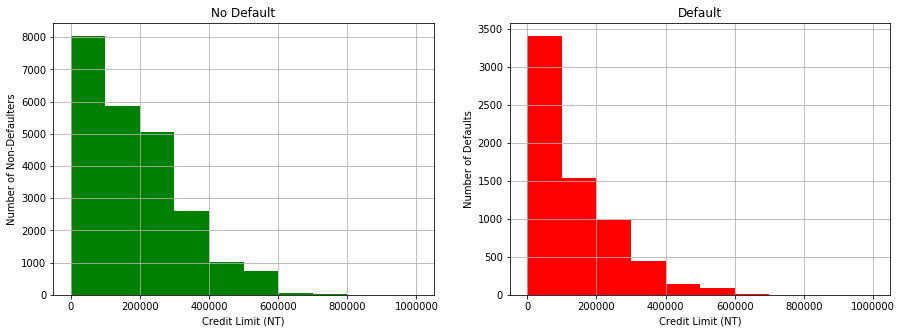

In [11]:
nd_lim = no_defaults['LIMIT_BAL']
de_lim = defaults['LIMIT_BAL']

plt.figure(figsize=(15, 5))
bin_size = [0, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000]

plt.subplot(1, 2, 1)
nd_lim.hist(bins=bin_size, color='g')
plt.xlabel('Credit Limit (NT)')
plt.ylabel('Number of Non-Defaulters')
plt.title('No Default')

plt.subplot(1, 2, 2)
de_lim.hist(bins=bin_size, color='r')
plt.xlabel('Credit Limit (NT)')
plt.ylabel('Number of Defaults')
plt.title('Default')

plt.show()

In [12]:
diff=nd_lim.mean( ) - de_lim.mean()
size = np.array([len(de_lim), len(nd_lim)])
sd = np.array([de_lim.std(), nd_lim.std()])
diff_se = (sum(sd ** 2 / size)) ** 0.5  
from scipy.stats import ttest_ind
print(ttest_ind(nd_lim, de_lim, equal_var=False))

Ttest_indResult(statistic=28.951587933509845, pvalue=3.3641002455114717e-178)


### Further Research

I will test my hypothesis of higher default payments from individuals who carry a larger balance. I will approach this by plotting their monthly balances and coming up with a comparative score for each subject, and then compare the scores of those that defaulted against those that did not.

I will also compare the predictive power of each attribute to determine which are the best indicators of future defaults. I will determine the p-values or perform AB tests on each of the attributes to decide which are the most effective at predicting credit card defaults. 